we will use transfer learning to create a simple neural network that can recognize images from CIFAR10 datasets. below importing all necessary python library.

In [23]:
import pandas as pd
import numpy as np
import scipy as sp
import os
#  
# import backend
import tensorflow as  tf
#
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
# all layers 
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D, Activation, MaxPooling2D,GlobalAveragePooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
# 
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.constraints import maxnorm
# Data processing

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
# Progressor

MobileNet can classify 1,000 different images.MobileNet can classify 1,000 different images.First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. include_top=True means , i will use this pretrained model to check with some new images for my trial(just giving try how it is working for new images). second part of my code , i will add include_top=False . for using this pretrained model as basemodel and addition layer i will add in last layer .we use transfer learning with this model, we will strip off the final layers.

In [2]:
model = MobileNet(weights='imagenet',include_top=True)

17227776/17225924 [==============================] - 1s 0us/step


In [3]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

'********************'

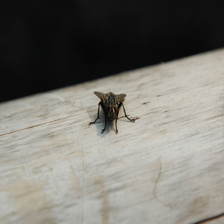

[78]
('n01776313', 'tick', 0.61766654)
('n02229544', 'cricket', 0.17187399)
('n02190166', 'fly', 0.09144843)
('n02177972', 'weevil', 0.033978917)
('n02219486', 'ant', 0.021155048)


'********************'

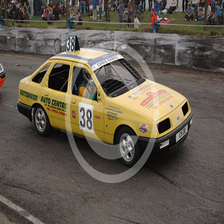

[468]
('n02930766', 'cab', 0.88918126)
('n04037443', 'racer', 0.03145076)
('n04285008', 'sports_car', 0.02901486)
('n03977966', 'police_van', 0.022072436)
('n02974003', 'car_wheel', 0.017816072)


'********************'

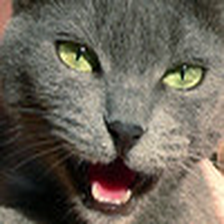

[285]
('n02124075', 'Egyptian_cat', 0.8027152)
('n02123597', 'Siamese_cat', 0.10588562)
('n02123394', 'Persian_cat', 0.026779532)
('n02129165', 'lion', 0.019936021)
('n02125311', 'cougar', 0.011754269)


In [8]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://farm2.static.flickr.com/1369/1094644992_b30f2c9740_o.jpg",
    "https://farm3.static.flickr.com/2359/2162410480_7346414fd6.jpg",
    "https://farm2.static.flickr.com/1207/620685615_9d7a1d0189_t.jpg"
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("********************")
    display(img)
    print(np.argmax(pred,axis=1))

    lst = decode_predictions(pred, top=5)
    for itm in lst[0]:
        print(itm)

In [48]:
# loading the dataset 
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
# here one hot encoding for actual test data and scaling for actual test set 


In [56]:
#from scipy import io as sio

#X_train = np.array([sp.misc.imresize(x, (299, 299)) for x in X_train])
#X_train = np.array([sp.misc.(x, (299, 299)) for x in X_train])

In [54]:
# normalize pixel values
X_test = X_test.astype('float32')
X_test=  X_test / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_train = X_train.astype('float32')
X_train =  X_train / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

reload the MobileNet and set the include_top parameter to False. This setting instructs Keras not to load the final classification layers. 


In [57]:
#@title Default title text
#batch_size = 20
#IMG_SIZE = 299 
#input_shape = (299,299,3)
#IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#input_shape = (299,299,3)

In [33]:
base_model_1 = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

In [50]:
#Lets add the final layers to these base models where the actual classification is done in the dense layers

model_1= Sequential()
model_1.add(base_model_1) #Adds the base model (in this case vgg19 to model_1)
model_1.add(Flatten())

In [ ]:
#Before we add the dense layers we must know the shape of the
# output of the flatten layer so we can define the input shape to the dense layer accordingly.
model_1.summary()

In [ ]:
#So after the flatten layer we see the output to be a vector of (512,1).This will help in deciding 
#the number of neurons in the dense layer following the flatten layer.
#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [ ]:
#Check final model summary
model_1.summary()

In [ ]:
learn_rate=.001

#sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
model_1.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(zca_epsilon=0,
                            #width_shift_range = 0.1,
                            horizontal_flip = True,
                            fill_mode='reflect',
                            )

In [ ]:
# get batch iterator for training
train_iterator = datagen.flow(X_train, y_train)
# get batch iterator for test
test_iterator = datagen.flow(X_test, y_test)
# fit model
history = model.fit_generator(train_iterator, validation_data=test_iterator, epochs = 20,callbacks=[lrr],verbose=1)

In [ ]:
# Evaluate the model for test data

# evaluate model loss on test dataset
test_loss, test_acc = model.evaluate_generator(test_iterator, verbose=2)

In [ ]:
# plot loss and accuracy during training
# plot loss during training
def plotmodel(hist): 
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='Actual test dataset with augment')
    plt.legend()
# plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='Actual test dataset with augment')
    plt.legend()
    plt.show()

In [ ]:
def plot_confusion_matrix(y_test_cat, predicted_classes, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test_cat, predicted_classes )
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())
plotmodel(history)

In [ ]:
# Evaluate the model for test data

predicted_classes = model.predict_classes(X_test) 
predicted_classes


In [ ]:
y_test[0:3]

In [ ]:
# basically it is in binary fromat ,so converting to numeric 
y_test_cat = y_test.argmax(1)

In [ ]:
y_test_cat[0:2]

In [ ]:
# reshaping the pred array to same as actual test array 
# predicted_classes1 = predicted_classes.reshape(predicted_classes.shape[0],-1)
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_cat, predicted_classes, classes=class_names,
                      title='Normalized confusion matrix')